INFO 583- Final Project Part 1

Group Members:

Ananye Shobhith Gajula,
Estephanny Almiron,
Sravya Koppula,
Carli Danduone,
Veera Venkata Sai Chakravarthy Vurimi

**Final Project Part 1 Deliverables: **


1. Clearly define a business problem that can be addressed through the application of analytics. Who does the problem affect? What are the financial and social implications of a potential solution? (1-2 paragraphs) (10 pts.)

2. Identify the data that you are planning to use. Perform exploratory data analysis, build preliminary models that we covered in class to confirm that you would be able to model the problem using data mining techniques. (40 pts.)


POSSIBLE DATA SETS:




**FINAL Data Set Link : **

Suicide Rates : https://www.kaggle.com/datasets/ronaldonyango/global-suicide-rates-1990-to-2022

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5463019/


*Business Problem:*



**Business Problem : **

Mental health and suicide has been a global concern for decades. So much so that the World Health Organization developed the “Mental Health Action Plan in 2013 in an effort to reduce suicide rates worldwide” (Epidemiol, 1). This can be due to a number of related factors such as long working hours in order to make a stable enough income to survive in an increasingly expensive world, stress, anxiety and depression due to the immense amount of social media consumption throughout recent years and the feeling of needing to present a specific way for the validation of others and the everyday stresses of life and need to survive with the extreme rise of inflation recently.  


With this rise of inflation over recent years and and the downtick in the job market, a large concern throughout the globe is the correlation between socioeconomic status (SES) and rising suicide rates. Research shows that individuals who come from and currently live in lower socioeconomic backgrounds are typically at a higher risk for mental health related concerns that lead to suicide.


To address this ongoing issue, many companies such as insurance groups, healthcare agencies, counseling firms, and communities and governments throughout the world can implement initiatives like offering counseling, crisis hotlines, flexibility in the workplace, fair compensation, collaborating with local organizations, among other things to better help and understand their employees and community members. By diving into this data set and building predictive models, these companies will get a better understanding of the suicide rates per country and per year beginning in 1990 through 2022 to best address the pressing concern of socioeconomic status and suicide rates in a number of countries to generate an income and profit along with creates innovative and helpful initiatives to lower the rates of suicide due to socioeconomic status in the workplace and community.







# **Importing Libraries and File**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['age_std_suicide_rates_1990-2022.csv']))

Saving age_std_suicide_rates_1990-2022.csv to age_std_suicide_rates_1990-2022.csv


In [ ]:
df.head()

RegionCode RegionName CountryCode CountryName  Year     Sex  SuicideCount  \
0         EU     Europe         ALB     Albania  1992    Male            33   
1         EU     Europe         ALB     Albania  1992  Female            14   
2         EU     Europe         ALB     Albania  1993    Male            46   
3         EU     Europe         ALB     Albania  1993  Female            27   
4         EU     Europe         ALB     Albania  1994    Male            37   

   CauseSpecificDeathPercentage  StdDeathRate  DeathRatePer100K  Population  \
0                      0.331959      2.335802          2.076386   3247039.0   
1                      0.191860      0.866420          0.874563   3247039.0   
2                      0.477724      3.330938          2.937233   3227287.0   
3                      0.385164      1.755077          1.686025   3227287.0   
4                      0.419406      2.678796          2.332619   3207536.0   

            GDP  GDPPerCapita           GNI  GNIPerCapita  InflationRate  \
0  6.521750e+08    200.852220  9.061842e+08        1740.0     226.005421   
1  6.521750e+08    200.852220  9.061842e+08        1740.0     226.005421   
2  1.185315e+09    367.279225  1.024263e+09        2110.0      85.004751   
3  1.185315e+09    367.279225  1.024263e+09        2110.0      85.004751   
4  1.880951e+09    586.416135  1.216681e+09        2300.0      22.565053   

   EmploymentPopulationRatio  
0                     45.315  
1                     45.315  
2                     47.798  
3                     47.798  
4                     50.086

**Some information about the Dataset**

This dataset explores worldwide suicide trends, encompassing both age-standardized and crude death rates spanning from 1990 to 2022. Although it lacks information on age, it offers valuable insights into suicide patterns across various regions and timeframes.

Demographics on deck: Region, country, year, gender.

Economic insights: GDP, GDP per capita, GNI, GNI per capita, inflation rates, and employment-to-population ratios to explore potential socio-economic influences on suicide rates.

# **Data Preprocessing and Visualization**

<Axes: >

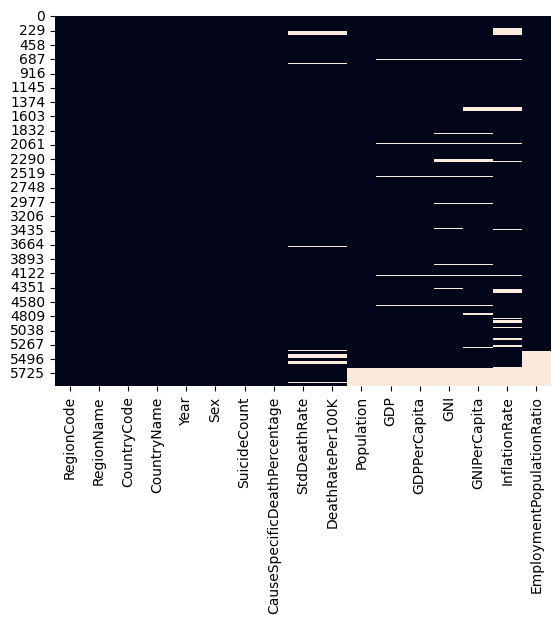

In [ ]:
# Finding out if there are any null values

sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# It is evident that there are null values in the dataset
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5928 entries, 0 to 5927
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    5928 non-null   object 
 1   RegionName                    5928 non-null   object 
 2   CountryCode                   5928 non-null   object 
 3   CountryName                   5928 non-null   object 
 4   Year                          5928 non-null   int64  
 5   Sex                           5928 non-null   object 
 6   SuicideCount                  5928 non-null   int64  
 7   CauseSpecificDeathPercentage  5927 non-null   float64
 8   StdDeathRate                  5720 non-null   float64
 9   DeathRatePer100K              5720 non-null   float64
 10  Population                    5632 non-null   float64
 11  GDP                           5566 non-null   float64
 12  GDPPerCapita                  5566 non-null   float64
 13  GNI

In [ ]:
means = df.select_dtypes(include=['float64', 'int64']).mean()

# Fill NaN values with the mean of their respective columns
df.fillna(means, inplace=True)

In [ ]:
df.describe()

Year  SuicideCount  CauseSpecificDeathPercentage  StdDeathRate  \
count  5928.000000   5928.000000                   5928.000000   5928.000000   
mean   2005.740047   1267.660088                      1.264219      9.649577   
std       8.745704   3887.349179                      1.188628     10.525342   
min    1990.000000      0.000000                      0.000000      0.000000   
25%    1999.000000     30.000000                      0.431141      2.667127   
50%    2006.000000    226.500000                      0.883050      6.442110   
75%    2013.000000    836.000000                      1.869803     12.657007   
max    2022.000000  51464.000000                     16.666667     80.261488   

       DeathRatePer100K    Population           GDP   GDPPerCapita  \
count       5928.000000  5.928000e+03  5.928000e+03    5928.000000   
mean          10.688010  2.456184e+07  4.883873e+11   17423.508254   
std           11.554808  4.416934e+07  1.602493e+12   18734.065353   
min            0.000000  4.054200e+04  2.197630e+08      60.235121   
25%            2.862977  2.836412e+06  1.294687e+10    4123.506487   
50%            7.232743  7.542870e+06  8.085104e+10   10834.678210   
75%           13.812749  2.456184e+07  3.965000e+11   23977.173410   
max           83.522190  3.320316e+08  2.330000e+13  133711.794400   

                GNI   GNIPerCapita  InflationRate  EmploymentPopulationRatio  
count  5.928000e+03    5928.000000    5928.000000                5928.000000  
mean   4.975887e+11   22147.217069      20.286455                  55.750811  
std    1.616438e+12   18010.428761     152.842637                   7.750433  
min    2.082832e+08     780.000000     -10.630097                  32.026000  
25%    1.318667e+10    9222.500000       1.705495                  51.475000  
50%    8.371258e+10   18970.000000       3.570507                  55.750811  
75%    4.590000e+11   28150.000000       9.812982                  59.957750  
max    2.370000e+13  152630.000000    4734.914347                  87.518000

In [ ]:
# Checking if null values are replaced by mean
df.isnull().count()

RegionCode                      5928
RegionName                      5928
CountryCode                     5928
CountryName                     5928
Year                            5928
Sex                             5928
SuicideCount                    5928
CauseSpecificDeathPercentage    5928
StdDeathRate                    5928
DeathRatePer100K                5928
Population                      5928
GDP                             5928
GDPPerCapita                    5928
GNI                             5928
GNIPerCapita                    5928
InflationRate                   5928
EmploymentPopulationRatio       5928
dtype: int64

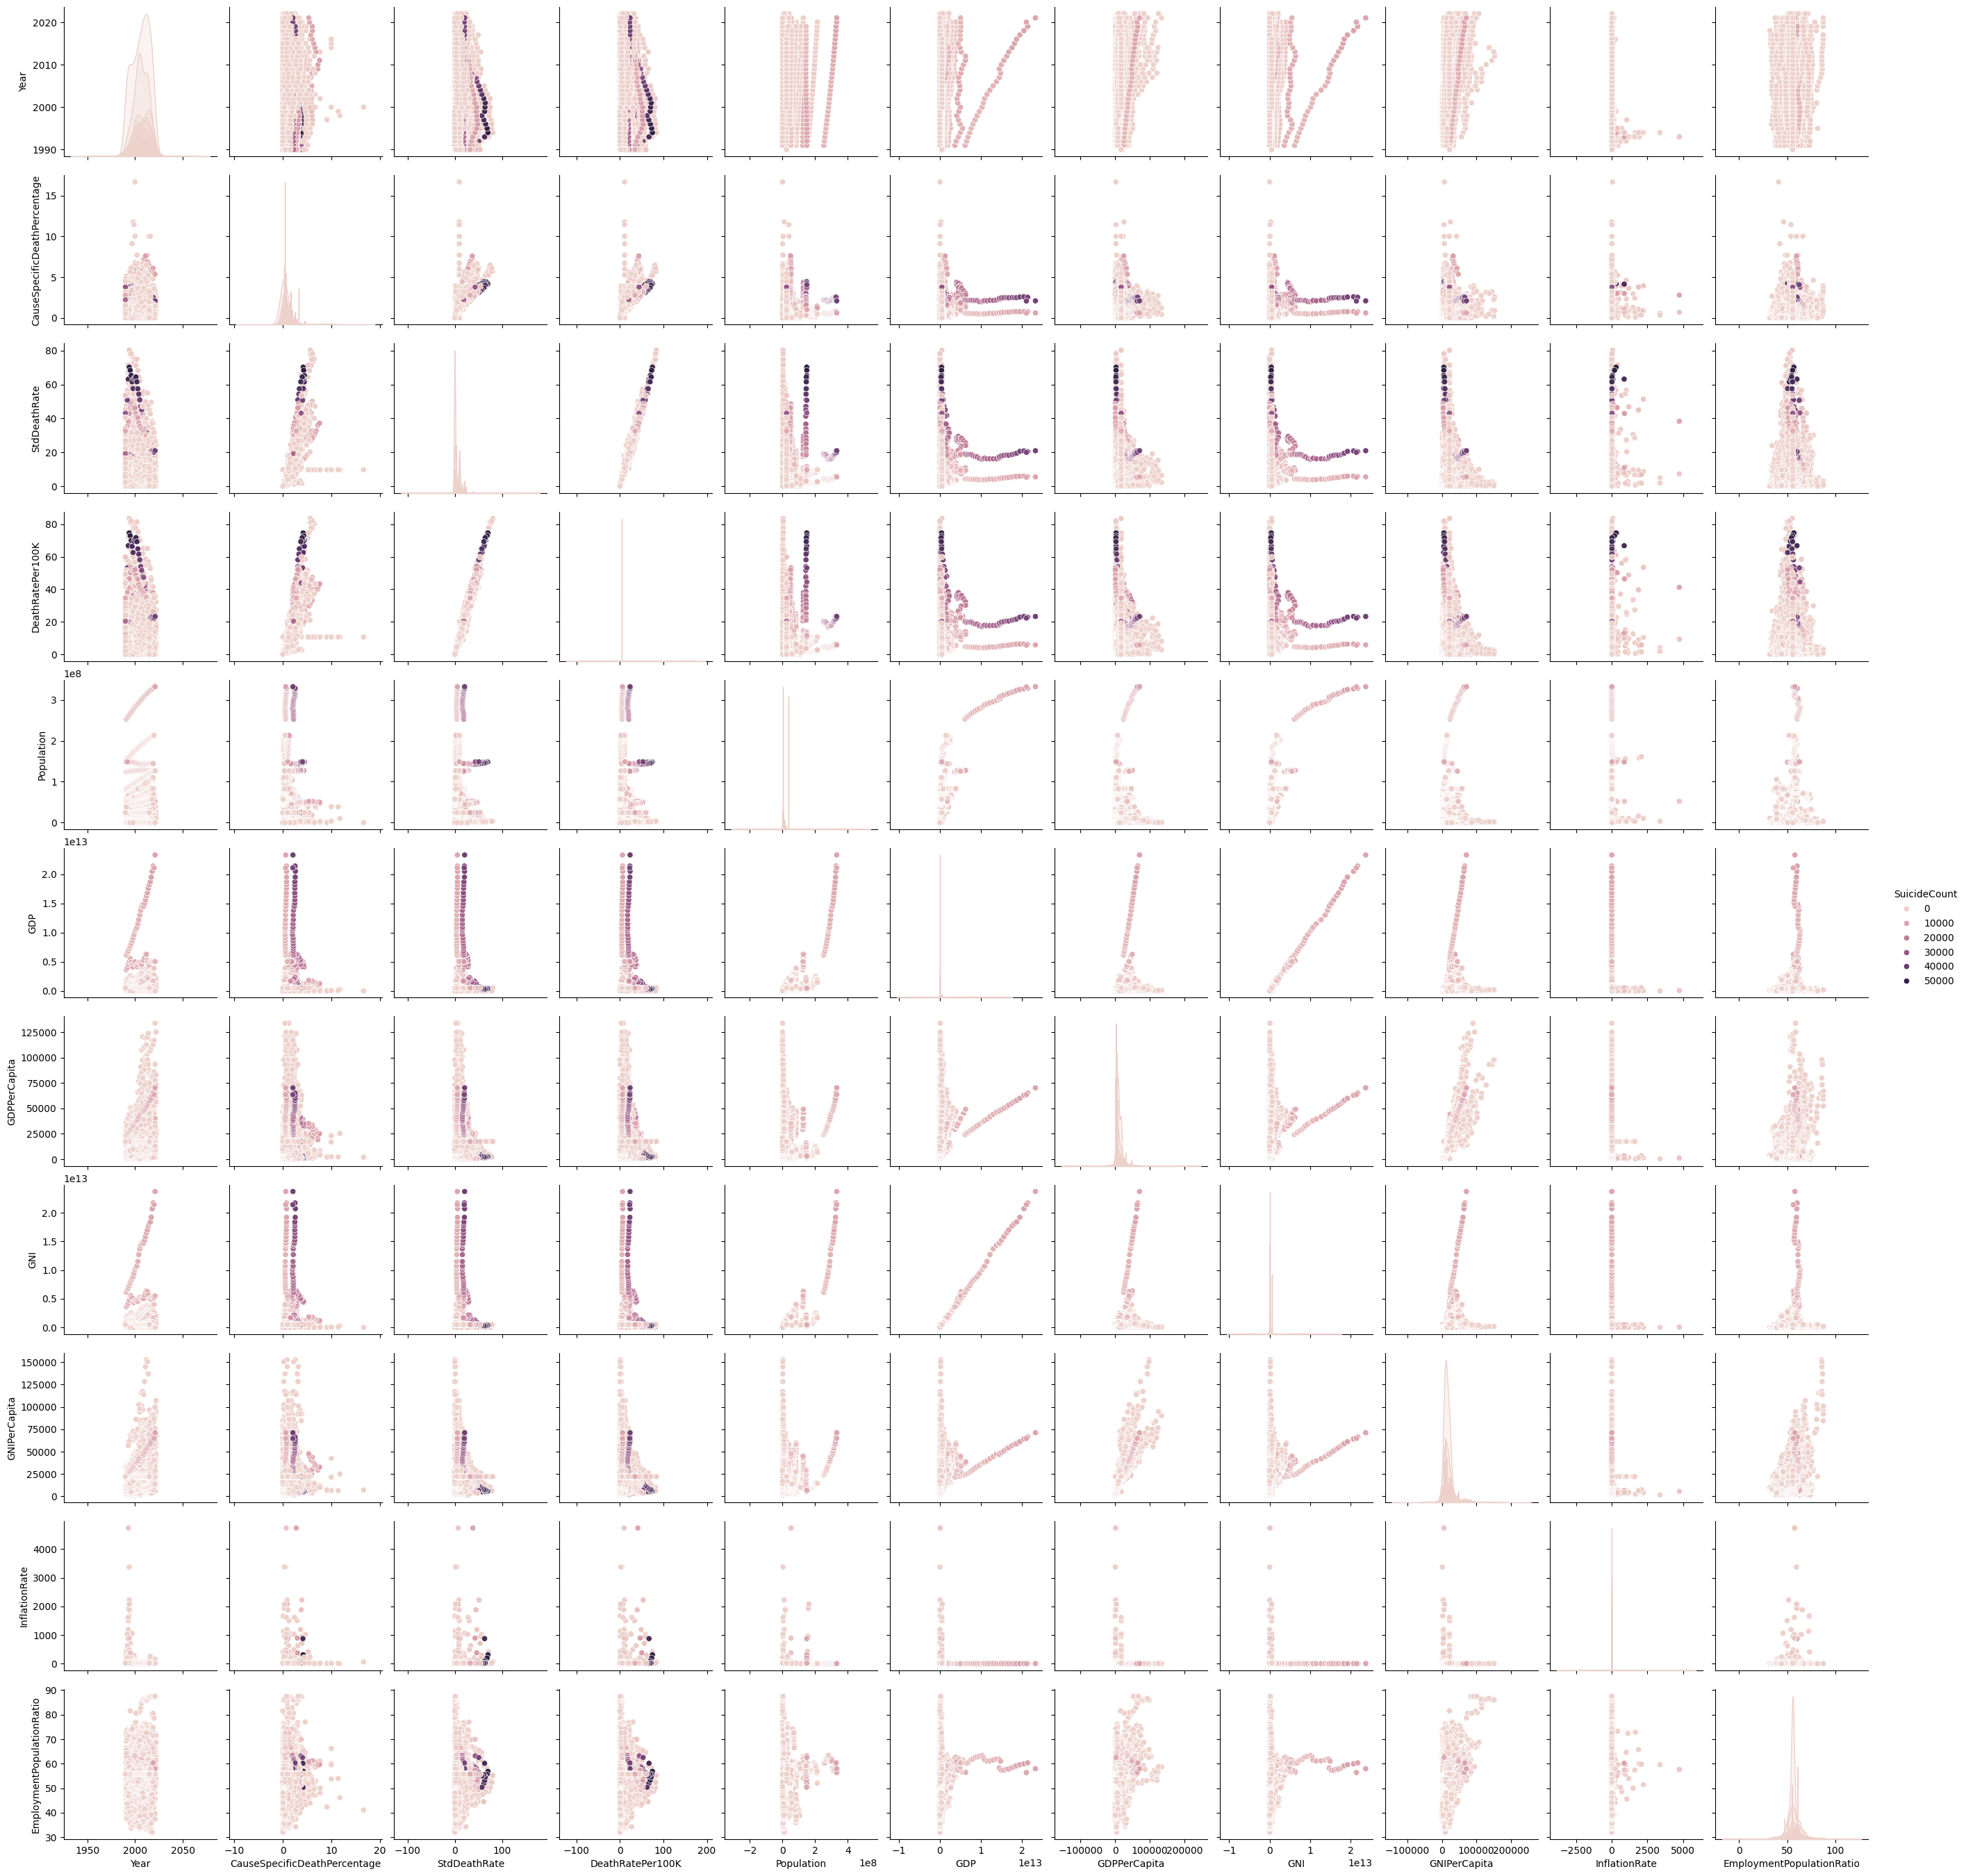

In [ ]:
# Pairplot of the data
sns.pairplot(data = df, hue='SuicideCount')

<Axes: >

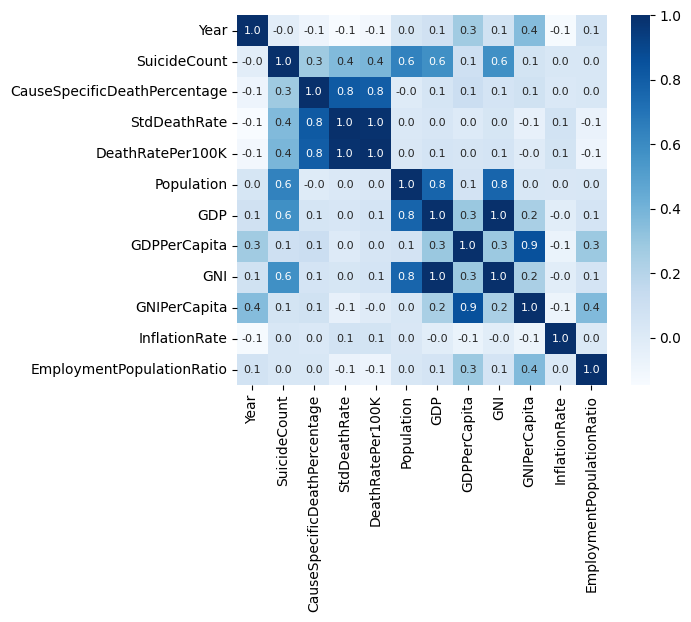

In [ ]:
# Correlation matrix
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: xlabel='Year', ylabel='SuicideCount'>

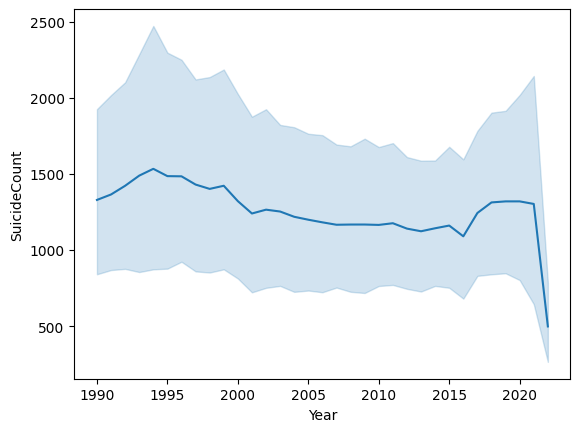

In [ ]:
# Line plot of number of suicides for each year from 1990 to 2022
sns.lineplot(data = df, x='Year', y='SuicideCount')

# **Creating** **Categorical** **variable** **to** **test** **Classification** **Models**

In [ ]:
# Creating a categorical variable named "Suicide_Count_Category" for SuicideCount to test classification models and find out whether suicide count is low or high.

SC_mean= df['SuicideCount'].mean()
df['Suicide_Count_Category'] = df['SuicideCount'].apply(lambda x: 'High' if x > SC_mean else 'Low')

In [ ]:
# This implies if suicide count in an area is above SC_mean, then it is High else it can be categorized as Low Suicide Count area.
SC_mean

1267.6600877192982

In [ ]:
df['Suicide_Count_Category'].value_counts()

Suicide_Count_Category
Low     4868
High    1060
Name: count, dtype: int64

In [ ]:
# Checking new variable
df.sample(6)

RegionCode                       RegionName CountryCode  \
3282         OA                          Oceania         NZL   
5418        NAC  North America and the Caribbean         DMA   
4597         EU                           Europe         SVK   
3146         EU                           Europe         MDA   
3080         AS                             Asia         ISR   
4016         EU                           Europe         POL   

              CountryName  Year     Sex  SuicideCount  \
3282          New Zealand  2001  Female           119   
5418             Dominica  1991    Male             0   
4597             Slovakia  2000  Female           135   
3146  Republic of Moldova  2007  Female            80   
3080               Israel  2018    Male           354   
4016               Poland  2007  Female           812   

      CauseSpecificDeathPercentage  StdDeathRate  DeathRatePer100K  \
3282                      0.852069      5.886772          6.018156   
5418                      0.000000      9.649577         10.688010   
4597                      0.549518      4.106481          4.864886   
3146                      0.385709      3.705236          4.306484   
3080                      1.578736      8.133591          8.032156   
4016                      0.464024      3.302510          4.122059   

      Population           GDP  GDPPerCapita           GNI  GNIPerCapita  \
3282   3880500.0  5.387243e+10  13882.856830  5.356963e+10       21390.0   
5418     69141.0  2.197630e+08   3178.475332  2.082832e+08        4420.0   
4597   5388720.0  2.924256e+10   5426.624281  2.984512e+10       11330.0   
3146   2874299.0  4.401173e+09   1531.216186  4.131590e+09        6030.0   
3080   8882800.0  3.770000e+11  42406.845430  3.690000e+11       40040.0   
4016  38120560.0  4.290000e+11  11254.314090  3.790000e+11       16230.0   

      InflationRate  EmploymentPopulationRatio Suicide_Count_Category  
3282       2.625816                  62.218000                    Low  
5418       5.557062                  55.750811                    Low  
4597      12.035781                  48.544000                    Low  
3146      12.367167                  57.232000                    Low  
3080       0.794076                  62.865000                    Low  
4016       2.458743                  48.817000                    Low

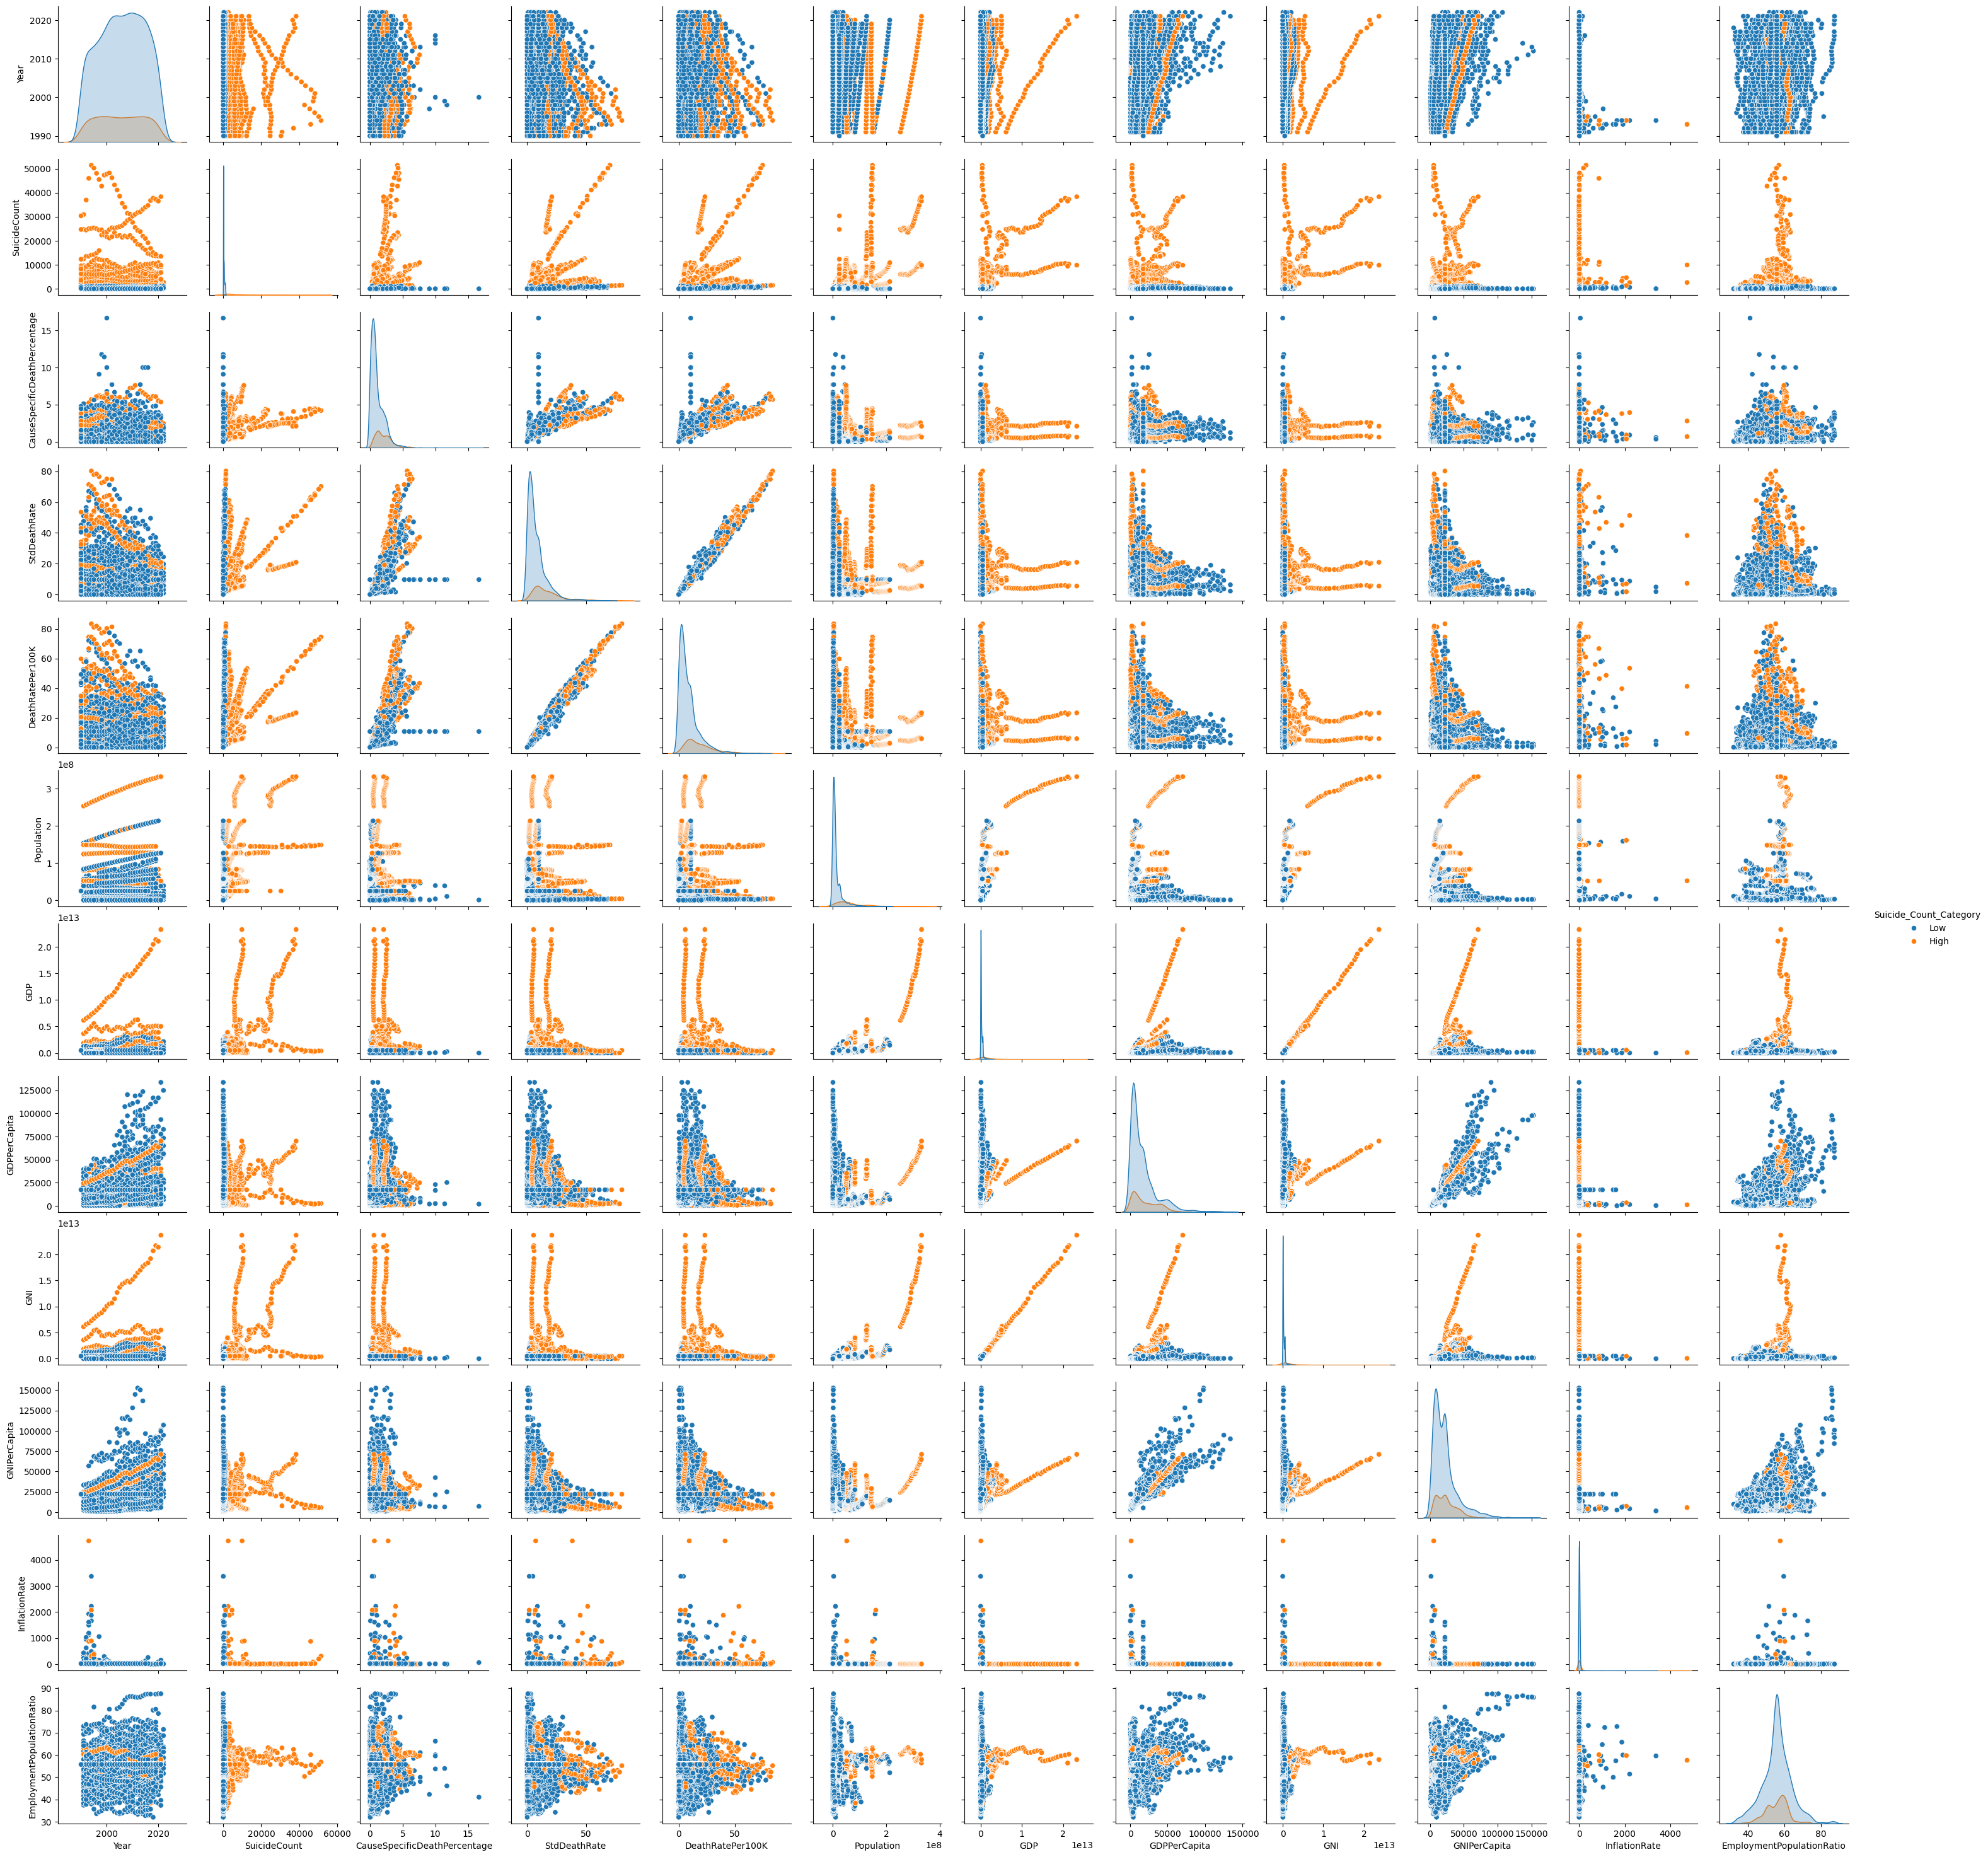

In [ ]:
# Pairplot of Suicide_Count_Category with other variables
sns.pairplot(df, hue='Suicide_Count_Category')

In [ ]:
df['Suicide_Count_Category'] = df['Suicide_Count_Category'].astype('category')

In [ ]:
df.columns

Index(['RegionCode', 'RegionName', 'CountryCode', 'CountryName', 'Year', 'Sex',
       'SuicideCount', 'CauseSpecificDeathPercentage', 'StdDeathRate',
       'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita', 'GNI',
       'GNIPerCapita', 'InflationRate', 'EmploymentPopulationRatio',
       'Suicide_Count_Category'],
      dtype='object')

# **Creating input and target variable**

In [ ]:
X = df.drop(['SuicideCount', 'Suicide_Count_Category', 'CountryCode', 'CountryName'], axis=1)
y = pd.get_dummies(df['Suicide_Count_Category'], prefix='prefix_for_dummy', drop_first=True)

In [ ]:
# Creating Dummies for Categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.head()

Year  CauseSpecificDeathPercentage  StdDeathRate  DeathRatePer100K  \
0  1992                      0.331959      2.335802          2.076386   
1  1992                      0.191860      0.866420          0.874563   
2  1993                      0.477724      3.330938          2.937233   
3  1993                      0.385164      1.755077          1.686025   
4  1994                      0.419406      2.678796          2.332619   

   Population           GDP  GDPPerCapita           GNI  GNIPerCapita  \
0   3247039.0  6.521750e+08    200.852220  9.061842e+08        1740.0   
1   3247039.0  6.521750e+08    200.852220  9.061842e+08        1740.0   
2   3227287.0  1.185315e+09    367.279225  1.024263e+09        2110.0   
3   3227287.0  1.185315e+09    367.279225  1.024263e+09        2110.0   
4   3207536.0  1.880951e+09    586.416135  1.216681e+09        2300.0   

   InflationRate  ...  RegionCode_EU  RegionCode_NAC  RegionCode_OA  \
0     226.005421  ...           True           False          False   
1     226.005421  ...           True           False          False   
2      85.004751  ...           True           False          False   
3      85.004751  ...           True           False          False   
4      22.565053  ...           True           False          False   

   RegionName_Asia  RegionName_Central and South America  RegionName_Europe  \
0            False                                 False               True   
1            False                                 False               True   
2            False                                 False               True   
3            False                                 False               True   
4            False                                 False               True   

   RegionName_North America and the Caribbean  RegionName_Oceania  Sex_Male  \
0                                       False               False      True   
1                                       False               False     False   
2                                       False               False      True   
3                                       False               False     False   
4                                       False               False      True   

   Sex_Unknown  
0        False  
1        False  
2        False  
3        False  
4        False  

[5 rows x 23 columns]

In [ ]:
y.head()

prefix_for_dummy_Low
0                  True
1                  True
2                  True
3                  True
4                  True

# **Scaling Data**

In [ ]:
# Scaling input data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_, columns= X.columns)

In [ ]:
X_rescaled.sample(5)

Year  CauseSpecificDeathPercentage  StdDeathRate  DeathRatePer100K  \
3114  0.875                      0.057727      0.088855          0.119754   
5697  0.500                      0.063604      0.036053          0.033892   
2616  0.125                      0.144963      0.218892          0.189279   
5717  0.000                      0.053067      0.092272          0.127922   
3568  0.750                      0.031469      0.039566          0.039689   

      Population       GDP  GDPPerCapita       GNI  GNIPerCapita  \
3114    0.181876  0.089691      0.258597  0.086490      0.281396   
5697    0.073861  0.020952      0.129914  0.020987      0.140713   
2616    0.002136  0.000014      0.004948  0.000009      0.022588   
5717    0.073861  0.020952      0.129914  0.020987      0.140713   
3568    0.000404  0.000066      0.074424  0.000058      0.081330   

      InflationRate  ...  RegionCode_EU  RegionCode_NAC  RegionCode_OA  \
3114       0.002480  ...            1.0             0.0            0.0   
5697       0.006515  ...            0.0             0.0            0.0   
2616       0.006515  ...            0.0             0.0            0.0   
5717       0.006515  ...            1.0             0.0            0.0   
3568       0.002981  ...            0.0             1.0            0.0   

      RegionName_Asia  RegionName_Central and South America  \
3114              0.0                                   0.0   
5697              0.0                                   1.0   
2616              0.0                                   1.0   
5717              0.0                                   0.0   
3568              0.0                                   0.0   

      RegionName_Europe  RegionName_North America and the Caribbean  \
3114                1.0                                         0.0   
5697                0.0                                         0.0   
2616                0.0                                         0.0   
5717                1.0                                         0.0   
3568                0.0                                         1.0   

      RegionName_Oceania  Sex_Male  Sex_Unknown  
3114                 0.0       1.0          0.0  
5697                 0.0       0.0          0.0  
2616                 0.0       1.0          0.0  
5717                 0.0       0.0          0.0  
3568                 0.0       0.0          0.0  

[5 rows x 23 columns]

# **Logistic Regression Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [ ]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logmodel.predict(X_test)

Confusion Matrix (Logistic Regression)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[ 197,  126],
       [  19, 1437]])

Classification Report (Logistic Regression)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.91      0.61      0.73       323
        True       0.92      0.99      0.95      1456

    accuracy                           0.92      1779
   macro avg       0.92      0.80      0.84      1779
weighted avg       0.92      0.92      0.91      1779



ROC Curve (Logistic Regression)

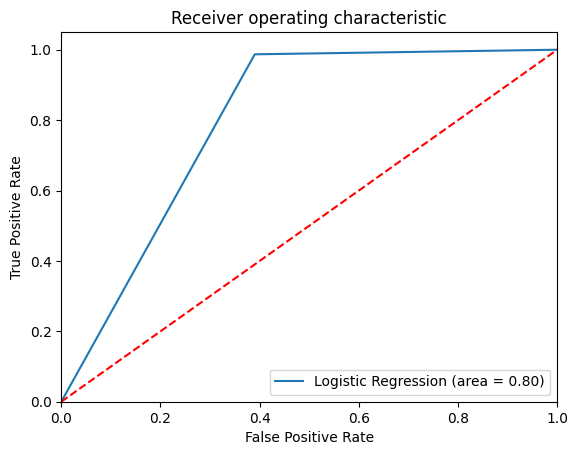

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Decision Tree Classifier**

In [ ]:
dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

Confusion Matrix (Decision Tree Classifier)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred_dt)

array([[ 304,   19],
       [  44, 1412]])

Classification Report(Decision Tree Classifier)

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

       False       0.87      0.94      0.91       323
        True       0.99      0.97      0.98      1456

    accuracy                           0.96      1779
   macro avg       0.93      0.96      0.94      1779
weighted avg       0.97      0.96      0.97      1779



ROC Curve (Decision Tree Classifier)

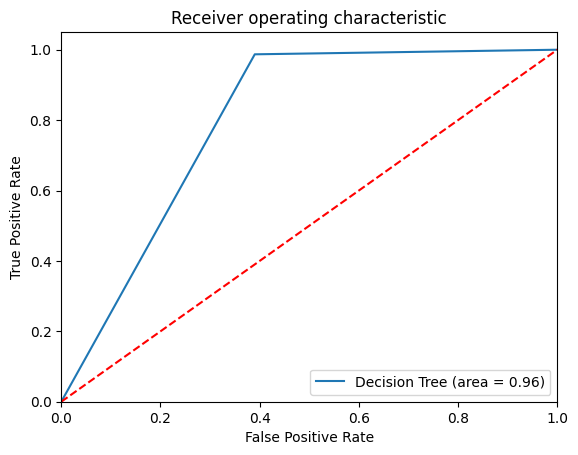

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

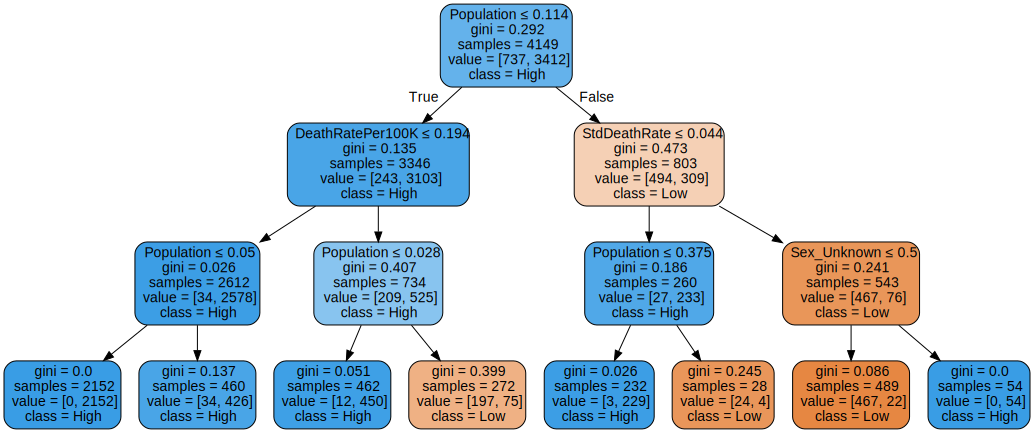

In [ ]:
import graphviz
dot_data = tree.export_graphviz(dt_model, out_file=None,
                      feature_names=X.columns,
                      class_names=['Low','High'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=42)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

<ipython-input-107-8f3b5eb62d53>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


Confusion Matrix (Random Forest)

In [ ]:
confusion_matrix(y_test,y_pred_rf)

array([[ 252,   71],
       [   2, 1454]])

Classification Report (Random Forest)

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

       False       0.99      0.78      0.87       323
        True       0.95      1.00      0.98      1456

    accuracy                           0.96      1779
   macro avg       0.97      0.89      0.92      1779
weighted avg       0.96      0.96      0.96      1779



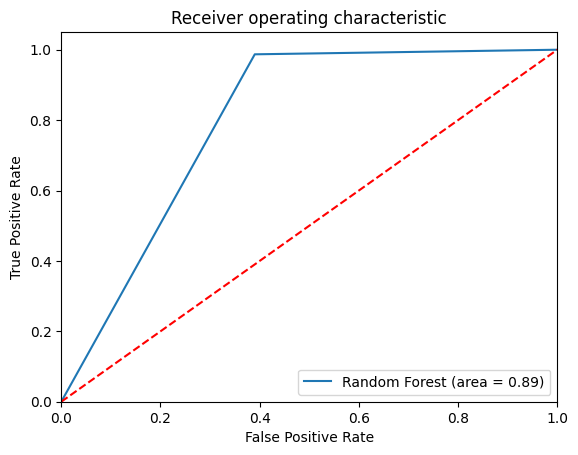

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Boost Tree Model**

In [ ]:
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix (Boost Tree)

In [ ]:
confusion_matrix(y_test,y_pred_bt)

array([[ 312,   11],
       [  11, 1445]])

Classification Report (Boost Tree)

In [ ]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       323
        True       0.99      0.99      0.99      1456

    accuracy                           0.99      1779
   macro avg       0.98      0.98      0.98      1779
weighted avg       0.99      0.99      0.99      1779



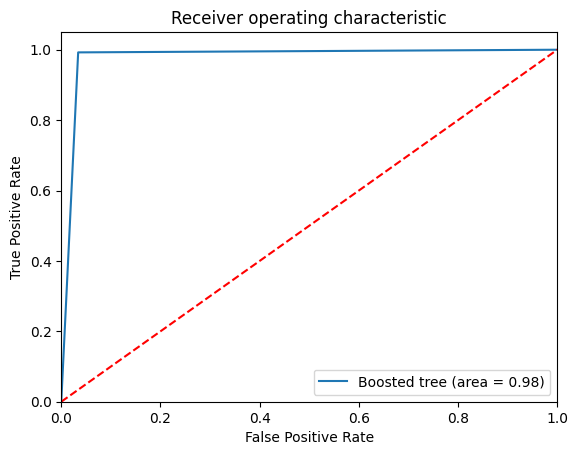

In [ ]:
# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, y_pred_bt)
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, y_pred_bt)

plt.figure()
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **KNN Neighbor**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix (KNN)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 197  126]
 [  19 1437]]


Classification Report (KNN)

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

       False       0.95      0.88      0.92       323
        True       0.97      0.99      0.98      1456

    accuracy                           0.97      1779
   macro avg       0.96      0.94      0.95      1779
weighted avg       0.97      0.97      0.97      1779



In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,y_pred_knn))

ROC AUC:  0.936368778280543


In [ ]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

In [ ]:
cv_scores[:5]

[0.9763797288066621,
 0.9672219396282354,
 0.9693909049951314,
 0.9643312453674773,
 0.9575830947432674]

<Axes: >

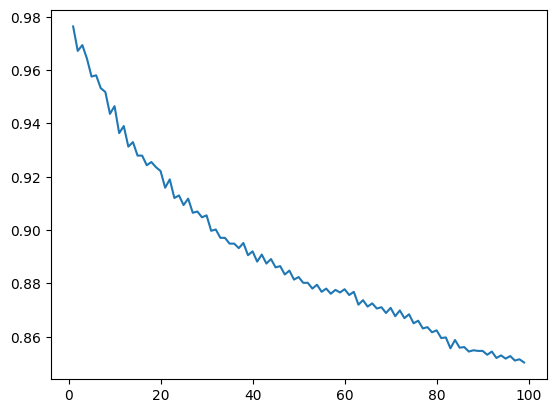

In [ ]:
sns.lineplot(x=range(1,max_K), y=cv_scores)

In [ ]:
# Find the index of the maximum ROC AUC value
optimal_k_index = np.argmax(cv_scores)

# Retrieve the optimal k value
optimal_k = optimal_k_index + 1  # Adding 1 because K ranges from 1 to max_K, not from 0 to max_K-1

# Retrieve the maximum ROC AUC value
max_roc_auc = cv_scores[optimal_k_index]

# Print the results
print('Optimal k for maximum ROC AUC:', optimal_k)
print('Maximum ROC AUC:')
print(max_roc_auc)

Optimal k for maximum ROC AUC: 1
Maximum ROC AUC:
0.9763797288066621


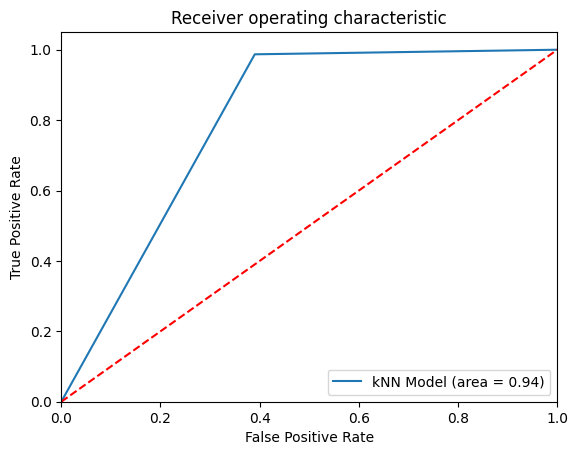

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

kNN_roc_auc = roc_auc_score(y_test, y_pred_knn)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred_knn)
plt.figure()
plt.plot(fpr, tpr, label='kNN Model (area = %0.2f)' % kNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

suicide_count = MultinomialNB(alpha=0.01)
suicide_count.fit(X_train, y_train)

y_pred_nb = suicide_count.predict(X_test)

print(confusion_matrix(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

[[  25  298]
 [   0 1456]]
              precision    recall  f1-score   support

       False       1.00      0.08      0.14       323
        True       0.83      1.00      0.91      1456

    accuracy                           0.83      1779
   macro avg       0.92      0.54      0.53      1779
weighted avg       0.86      0.83      0.77      1779



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(suicide_count, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

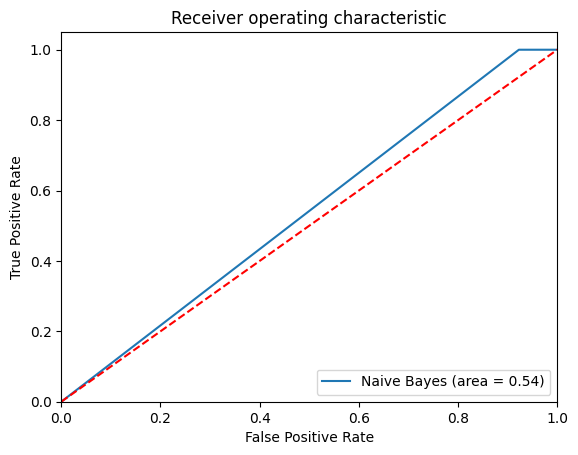

In [ ]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, y_pred_nb)

plt.figure()
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# **Final ROC AUC for all Classification Models**

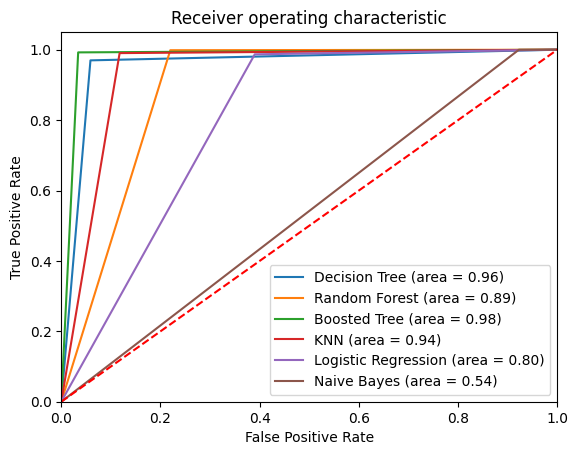

In [ ]:
# Decision Tree
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_pred_dt)

# Random Forest
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_pred_rf)

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, y_pred_bt)
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, y_pred_bt)

# kNN Model
kNN_roc_auc = roc_auc_score(y_test, y_pred_knn)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred_knn)

# Logistic Regression
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

#Naive Bayes
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, y_pred_nb)

plt.figure()
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted Tree (area = %0.2f)' % bt_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % kNN_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Precision: Both the Random Forest and Boosted Tree models exhibited the highest precision among all models when categorizing suicide counts. This implies that when these models label a category as high or low suicide count, they are more likely to be correct compared to other models.

Recall: The Boosted Tree model and Random Forests demonstrated higher recall values, indicating their ability to accurately identify and capture most of the actual suicide count categories. Put simply, these models are less likely to overlook high or low suicide count categories, reducing the occurrence of false negatives.

F1-score: Both the Boosted Tree and Random Forest models showed a similar range of F1-scores for categorizing suicide counts. This suggests that both models strike a comparable balance between precision and recall.

ROC AUC: The Boosted Tree model demonstrated the highest Area Under the Receiver Operating Characteristic Curve (ROC AUC), suggesting its superior ability in distinguishing between high and low occurrences of suicides. Conversely, the Random Forest model proved more effective in achieving a balanced performance in accurately identifying both high and low suicide cases.

To summarize, the Boosted Tree model emerges as the top performer in accurately identifying instances of high suicides and effectively discerning between various levels of occurrences.

# **Multiple Linear Regression**

Predicting numerical variable SuicideCount with linear regression.

In [ ]:
y = df['SuicideCount']

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X_rescaled, y, test_size=0.3, random_state=3)

In [ ]:
from sklearn.linear_model import LinearRegression

re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

In [ ]:
X_rescaled.columns

Index(['Year', 'CauseSpecificDeathPercentage', 'StdDeathRate',
       'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita', 'GNI',
       'GNIPerCapita', 'InflationRate', 'EmploymentPopulationRatio',
       'RegionCode_AS', 'RegionCode_CSA', 'RegionCode_EU', 'RegionCode_NAC',
       'RegionCode_OA', 'RegionName_Asia',
       'RegionName_Central and South America', 'RegionName_Europe',
       'RegionName_North America and the Caribbean', 'RegionName_Oceania',
       'Sex_Male', 'Sex_Unknown'],
      dtype='object')

In [ ]:
re_prices.intercept_

-2091.522687979439

In [ ]:
re_prices.coef_

array([-2.73325198e+02,  1.29548677e+03, -1.28126227e+04,  2.18270795e+04,
        1.59334680e+04,  6.84864262e+03,  1.05415748e+02, -1.99626546e+02,
       -1.13926521e+03,  1.00847946e+02,  1.09452610e+03,  5.44122270e+02,
        9.28306433e+01,  1.79487400e+02,  4.68327068e+02,  2.32985940e+02,
        5.44122270e+02,  9.28306433e+01,  1.79487400e+02,  4.68327068e+02,
        2.32985940e+02,  1.55672395e+01, -4.11224678e+03])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

import math

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

mse = mean_squared_error(valid_y, pred_y)
print("Mean Squared Error:", mse)

Regression model performance evaluation
R2:  0.6146514186838681
MAE:  1176.226318644431
RMSE:  2474.7444275554685
Max error:  32027.91208728117
Mean Squared Error: 6124359.981716844



In our project focusing on predicting suicide counts using a multiple linear regression model, key performance metrics were assessed to evaluate the model's effectiveness. The R-squared value, indicating the percentage of variability in suicide counts explained by the model, yielded a value of 0.615. Additionally, the Mean Absolute Error (MAE) was computed at 1176.23, while the Root Mean Squared Error (RMSE) stood at 2474.74. The maximum error observed was 32027.91, and the Mean Squared Error (MSE) was calculated to be 6124359.98. These metrics collectively provide a comprehensive understanding of the model's accuracy and predictive capabilities, guiding future refinements and enhancements to optimize its performance.